# Traffic Light Classification(Basic Level)

The structure of file directory is as follows                                                          
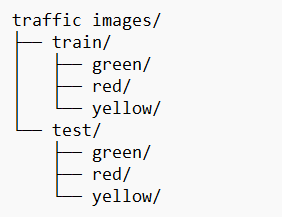
                                                                                                               


The code covers the aspect of classifying the traffic light by colours which is one aspect of traffic light classification.

The dataset will be read, exploratory data analysis will be done and classical Machine Learning models will be used.

The images have been taken from the source: https://github.com/asagar60/Udacity-ITSDC-Traffic-Light-Classifier/blob/master/traffic_light_images.rar

In [14]:
# Importing the libraries
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Defining the directory where the data is stored - we are using training for the same
data_dir = "traffic_light_images"

# Defining the categories or classes of the data present inside training folder
categories = ['green', 'red', 'yellow']

# Defining the image size for the models
img_size = (64, 64)

# Initializing lists for storing the image data and labels
data = []
labels = []

# Looping through the categories and read the image files present inside training subfolder
for category in categories:
    train_path = os.path.join(data_dir, "training", category)
    for img_name in os.listdir(train_path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(train_path, img_name)
            try:
                # Read the image and resize it to the desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                # Append the image data and label to the lists
                data.append(img)
                labels.append(category)
            except Exception as e:
                print("Error reading file:", img_path)

# Converting the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the number of images in each category
for category in categories:
    print("Number of images in", category, ":", len(labels[labels == category]))

# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Performing exploratory data analysis on the data
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Training set labels:", set(y_train))
print("Testing set labels:", set(y_test))


Number of images in green : 429
Number of images in red : 723
Number of images in yellow : 35
Training set shape: (949, 64, 64, 3)
Testing set shape: (238, 64, 64, 3)
Training set labels: {'red', 'yellow', 'green'}
Testing set labels: {'red', 'yellow', 'green'}


In [3]:
# Define the models to be trained and tested
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}
print(models)
print(type(models))

# Train and test each model
for name, model in models.items():
    print("Training", name, "model...")
    print(model)
    print(type(model))
    # Train the model on the training data
    model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
    # Test the model on the testing data
    y_pred = model.predict(x_test.reshape(x_test.shape[0], -1))
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(name, "model accuracy:", accuracy)


{'SVM': SVC(), 'Random Forest': RandomForestClassifier(), 'K-NN': KNeighborsClassifier(), 'Naive Bayes': GaussianNB()}
<class 'dict'>
Training SVM model...
SVC()
<class 'sklearn.svm._classes.SVC'>
SVM model accuracy: 0.9957983193277311
Training Random Forest model...
RandomForestClassifier()
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Random Forest model accuracy: 1.0
Training K-NN model...
KNeighborsClassifier()
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
K-NN model accuracy: 0.9831932773109243
Training Naive Bayes model...
GaussianNB()
<class 'sklearn.naive_bayes.GaussianNB'>
Naive Bayes model accuracy: 0.9915966386554622


In [4]:
test_dir = os.path.join(data_dir, "test")

In [5]:
test_dir

'traffic_light_images\\test'

In [7]:
for category in categories:
    test_path = os.path.join(test_dir, category)
    for img_name in os.listdir(test_path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(test_path, img_name)
            try:
                # Read the image and resize it to the desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                # Make a prediction using one of the trained models
                prediction = model.predict(img.reshape(1, -1))
                print("Prediction for the last trained model - in our case NAIVE BAYES: ", img_path, ":", prediction[0])
            except Exception as e:
                print("Error reading file:", img_path)

Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\00febbe1-a9ae-4b5f-b682-8ebfdae485a3.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\01ae3c3d-21c8-4711-853a-ba6fda9553bf.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\06ab17cd-888e-45de-9482-b432e23cea6a.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\0a251f2f-babd-4257-87be-2940bd4bacc8.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\0ab8c5a1-a750-4137-ad0a-13e5da55bd09.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\0acf7bce-03d1-46af-aac2-bbca22e1c1cb.jpg : green
Prediction for the last trained model - in our case NAIVE BAYES:  traffic_light_images\test\green\0ae63733-c453-42b2-8

In [8]:
#test_dir = os.path.join(data_dir, "test")

# Iterate over each image in the test folder
for category in categories:
    test_path = os.path.join(test_dir, category)
    for img_name in os.listdir(test_path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(test_path, img_name)
            try:
                # Read the image and resize it to the desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                # Use the trained SVM model to make a prediction on the image
                svm_prediction = models["SVM"].predict(img.reshape(1, -1))
                print("SVM prediction for: ", img_path, ":", svm_prediction[0])
            except Exception as e:
                print("Error reading file:", img_path)

SVM prediction for:  traffic_light_images\test\green\00febbe1-a9ae-4b5f-b682-8ebfdae485a3.jpg : green
SVM prediction for:  traffic_light_images\test\green\01ae3c3d-21c8-4711-853a-ba6fda9553bf.jpg : green
SVM prediction for:  traffic_light_images\test\green\06ab17cd-888e-45de-9482-b432e23cea6a.jpg : green
SVM prediction for:  traffic_light_images\test\green\0a251f2f-babd-4257-87be-2940bd4bacc8.jpg : green
SVM prediction for:  traffic_light_images\test\green\0ab8c5a1-a750-4137-ad0a-13e5da55bd09.jpg : green
SVM prediction for:  traffic_light_images\test\green\0acf7bce-03d1-46af-aac2-bbca22e1c1cb.jpg : green
SVM prediction for:  traffic_light_images\test\green\0ae63733-c453-42b2-89cf-e4a7877feda6.jpg : green
SVM prediction for:  traffic_light_images\test\green\0aec12bd-ce95-4400-937b-ece1fd7c3011.jpg : green
SVM prediction for:  traffic_light_images\test\green\0b2b43f5-cad6-41a3-80ab-baf02e9f7ff1.jpg : green
SVM prediction for:  traffic_light_images\test\green\0b3606b7-bf9e-49d8-8de8-801bb

In [13]:
# Make predictions using the kNN model
for category in categories:
    test_path = os.path.join(test_dir, category)
    for img_name in os.listdir(test_path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(test_path, img_name)
            try:
                # Read the image and resize it to the desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                # Make a prediction using the kNN model
                prediction = models["K-NN"].predict(img.reshape(1, -1))
                print("Prediction for K-NN: ", img_path, ":", prediction[0])
            except Exception as e:
                print("Error reading file:", img_path)

Prediction for K-NN:  traffic_light_images\test\green\00febbe1-a9ae-4b5f-b682-8ebfdae485a3.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\01ae3c3d-21c8-4711-853a-ba6fda9553bf.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\06ab17cd-888e-45de-9482-b432e23cea6a.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0a251f2f-babd-4257-87be-2940bd4bacc8.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0ab8c5a1-a750-4137-ad0a-13e5da55bd09.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0acf7bce-03d1-46af-aac2-bbca22e1c1cb.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0ae63733-c453-42b2-89cf-e4a7877feda6.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0aec12bd-ce95-4400-937b-ece1fd7c3011.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0b2b43f5-cad6-41a3-80ab-baf02e9f7ff1.jpg : green
Prediction for K-NN:  traffic_light_images\test\green\0b3606b7-bf9e-49d8-

In [12]:
# Making predictions using the Random Forest model
for category in categories:
    test_path = os.path.join(test_dir, category)
    for img_name in os.listdir(test_path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(test_path, img_name)
            try:
                # Read the image and resize it to the desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                # Make a prediction using the Random Forest model
                prediction = models["Random Forest"].predict(img.reshape(1, -1))
                print("Prediction for Random Forest: ", img_path, ":", prediction[0])
            except Exception as e:
                print("Error reading file:", img_path)

Prediction for Random Forest:  traffic_light_images\test\green\00febbe1-a9ae-4b5f-b682-8ebfdae485a3.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\01ae3c3d-21c8-4711-853a-ba6fda9553bf.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\06ab17cd-888e-45de-9482-b432e23cea6a.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0a251f2f-babd-4257-87be-2940bd4bacc8.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0ab8c5a1-a750-4137-ad0a-13e5da55bd09.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0acf7bce-03d1-46af-aac2-bbca22e1c1cb.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0ae63733-c453-42b2-89cf-e4a7877feda6.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0aec12bd-ce95-4400-937b-ece1fd7c3011.jpg : green
Prediction for Random Forest:  traffic_light_images\test\green\0b2b43f5-cad6-41a3-80ab-baf02e9f7ff1.jpg 

**This concludes the portion for detection of colour of images.**